In [161]:
import sqlite3
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

# get iris data

In [13]:
data = load_iris()

In [41]:
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [42]:
df['target'] = data.target

In [44]:
target_names = ['setosa', 'versicolor', 'virginica']

In [45]:
df['name'] = df['target'].apply(lambda x: target_names[x])

In [162]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# use these to check the filepath for visualizing sql in vs code

In [ ]:
# import os

# db_path = os.path.abspath('my_database.db')
# print(db_path)

# create database and upload our little dataset

In [53]:
conn = sqlite3.connect('my_database.db')

In [54]:
df.to_sql('iris_from_df', conn,  if_exists='replace', index=False)

150

In [163]:
# check that it works

In [55]:
query = """
SELECT * FROM iris_from_df;
"""

In [56]:
# Query the database and load data into a pandas DataFrame to verify
df_from_db = pd.read_sql_query(f'{query}', conn)

In [164]:
# it should!

In [165]:
df_from_db.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [65]:
# make thing cleaner
columns = ['sepal_length', 'sepal_width', 'petal_length',
       'petal_width', 'target', 'name']

In [66]:
df.columns = columns

In [166]:
# that's better
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


# now let's get an idea of what this dataset looks like, how these flowers relate to each other

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

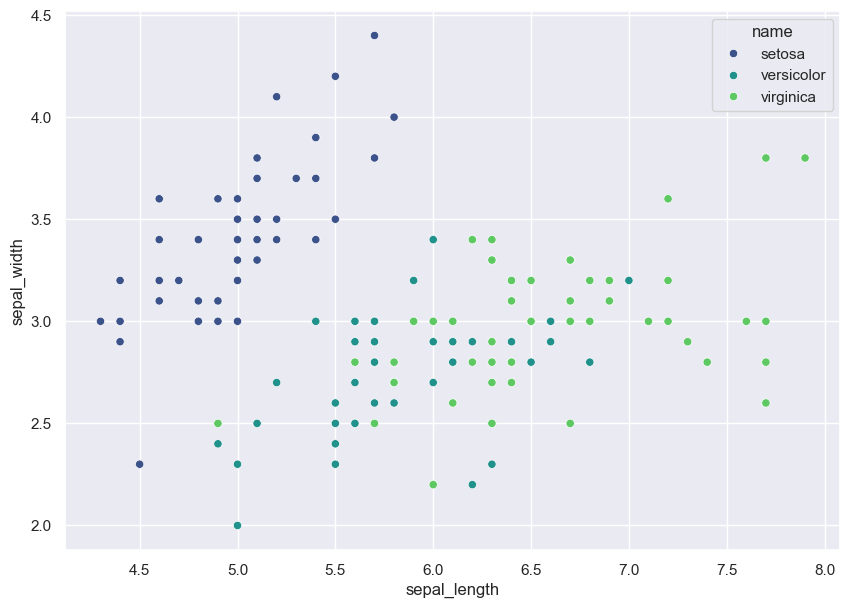

In [79]:
sns.set_theme(rc={'figure.figsize':(10,7)})
sns.scatterplot(x=df.sepal_length, y=df.sepal_width, hue=df.name, palette='viridis')

<Axes: xlabel='sepal_length', ylabel='petal_width'>

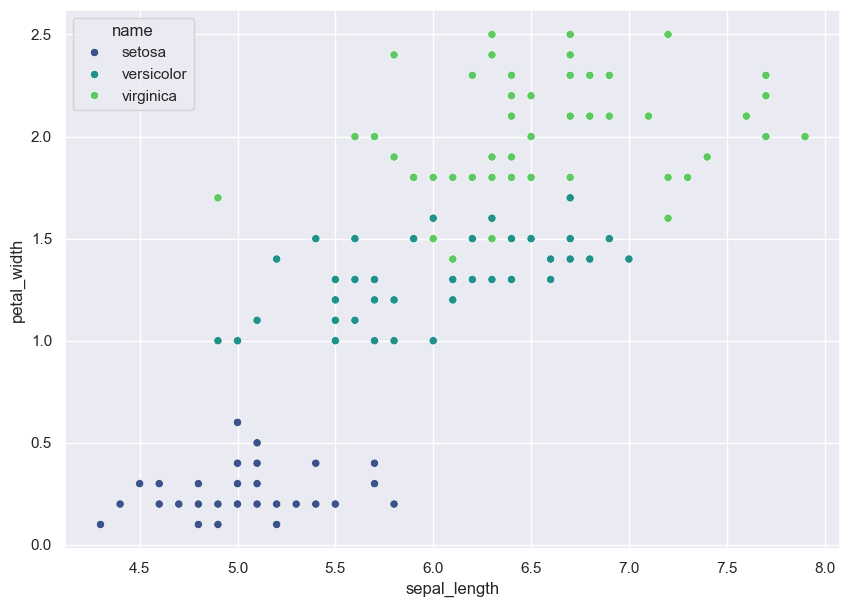

In [80]:
sns.set_theme(rc={'figure.figsize':(10,7)})

sns.scatterplot(x=df.sepal_length, y=df.petal_width, hue=df.name, palette='viridis')

<Axes: xlabel='petal_length', ylabel='petal_width'>

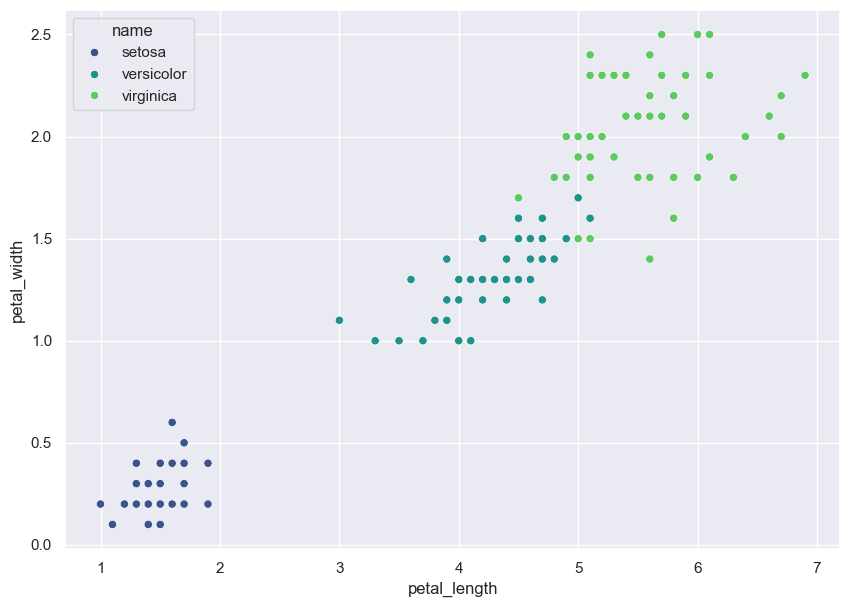

In [85]:
sns.set_theme(rc={'figure.figsize':(10,7)})

sns.scatterplot(x=df.petal_length, y=df.petal_width, hue=df.name, palette='viridis')

# see them ALL (this is a superpower)

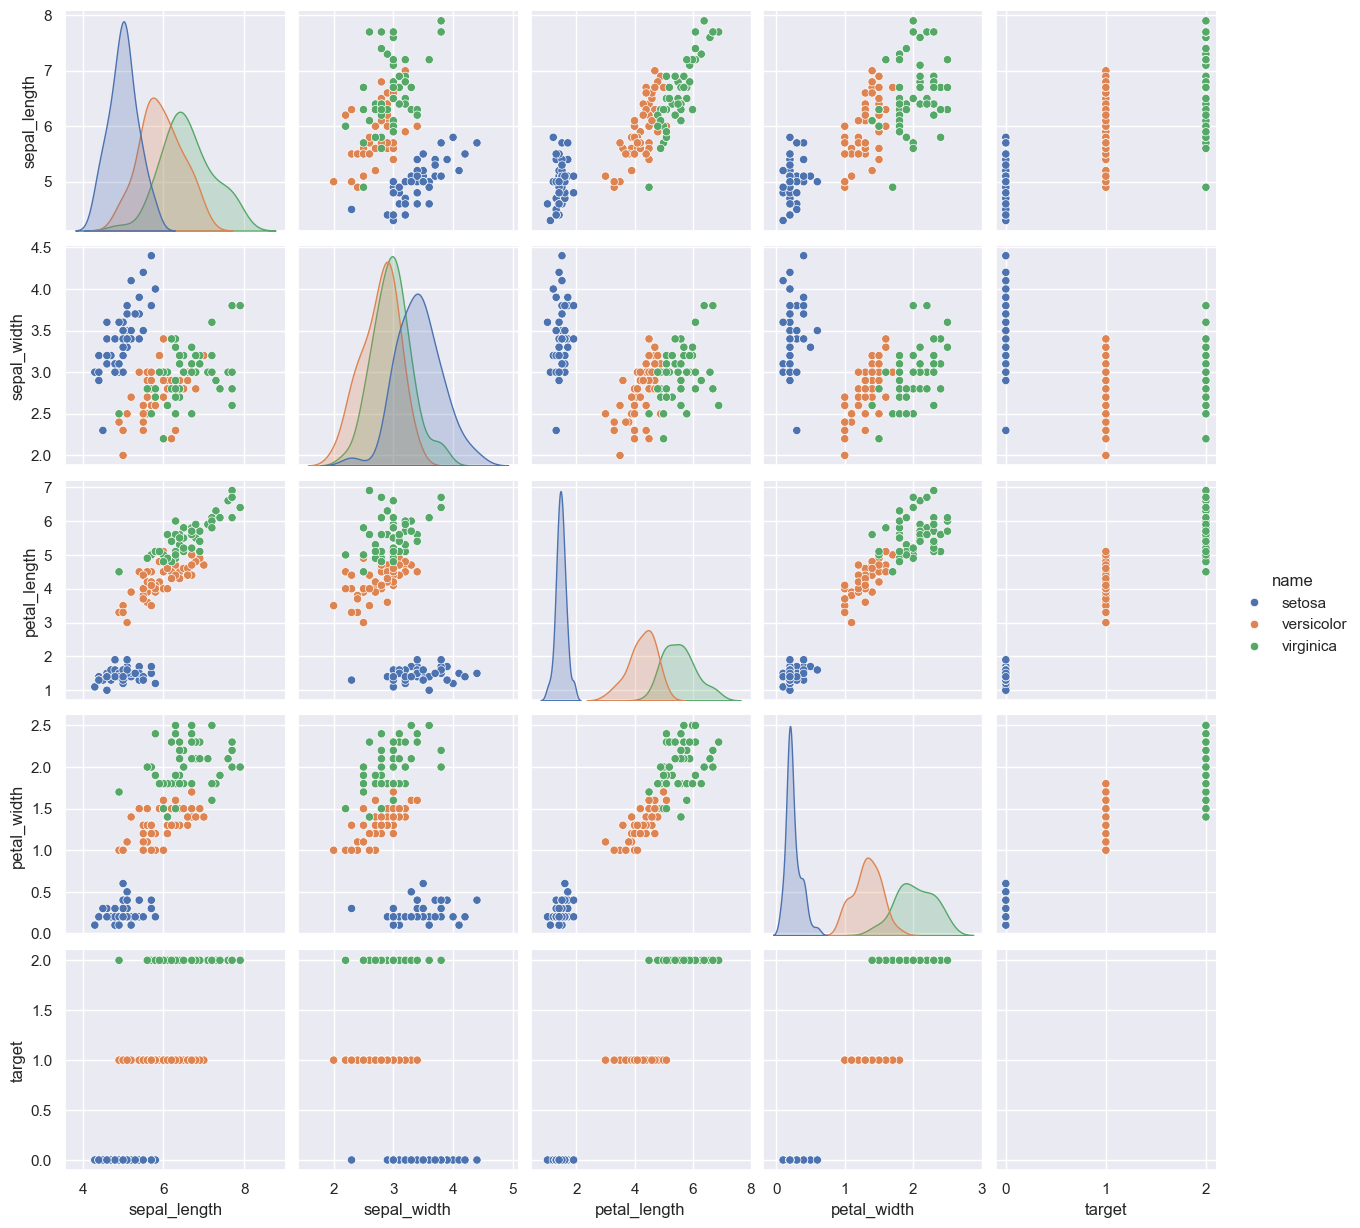

In [84]:
sns.pairplot(df, hue='name')

# now let's model: this is data science

In [86]:
from sklearn.model_selection import train_test_split

In [93]:
X = df.drop(['name', 'target'], axis=1)
y = df['target']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [167]:
# a nice simple model to start with, visual it here and understand it: http://vision.stanford.edu/teaching/cs231n-demos/knn/

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# here we go

In [103]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# that's it, you just trained your first model. take a moment and appreciate the powerful simplicity of the above cell
# it would take a dozen people in the 1800s all day to do the work you just ran in the above cell for thousands of flowers (or credit cards)
# and now you can predict on thousands of new examples in less than a second. appreciate that.

In [104]:
preds = knn.predict(X_test)

In [168]:
# you just predicted, appreciate that too

# now we examine and compare results

In [169]:
preds

array([2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1,
       2])

In [177]:
y_test.values

array([2, 2, 2, 1, 0, 0, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 0, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 1,
       2])

In [ ]:
# almost perfect, but we missed one

In [170]:
from sklearn import metrics

In [171]:
cf_matrix = metrics.confusion_matrix(y_test, preds)

In [172]:
print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.94      1.00      0.97        16
           2       1.00      0.94      0.97        17

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



<Axes: >

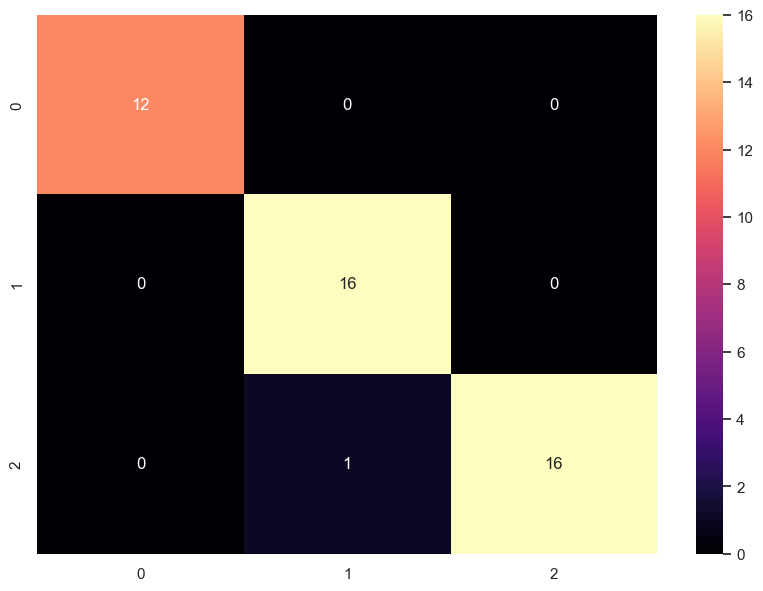

In [173]:
sns.heatmap(cf_matrix, annot=True, cmap='magma')

In [174]:
for i in range(len(preds)):
    if preds[i] != y_test.values[i]:
        print(i)

18


In [175]:
X_test.iloc[18]

sepal_length     6.0
sepal_width      2.2
petal_length     5.0
petal_width      1.5
true             2.0
prediction       1.0
flag             4.0
weight          30.0
Name: 119, dtype: float64

In [138]:
X_test['true'] = y_test
X_test['prediction'] = preds

In [178]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width,true,prediction,flag,weight
141,6.9,3.1,5.1,2.3,2,2,2.0,10
138,6.0,3.0,4.8,1.8,2,2,2.0,10
114,5.8,2.8,5.1,2.4,2,2,2.0,10
68,6.2,2.2,4.5,1.5,1,1,1.0,10
11,4.8,3.4,1.6,0.2,0,0,0.0,10


In [142]:
X_test['flag'] = X_test.apply(lambda x: x['true'] if x['true'] == x['prediction'] else 4, axis=1)

In [148]:
X_test['weight'] = X_test.apply(lambda x: 10 if x['flag'] != 4 else 30, axis=1)

<Axes: xlabel='petal_length', ylabel='petal_width'>

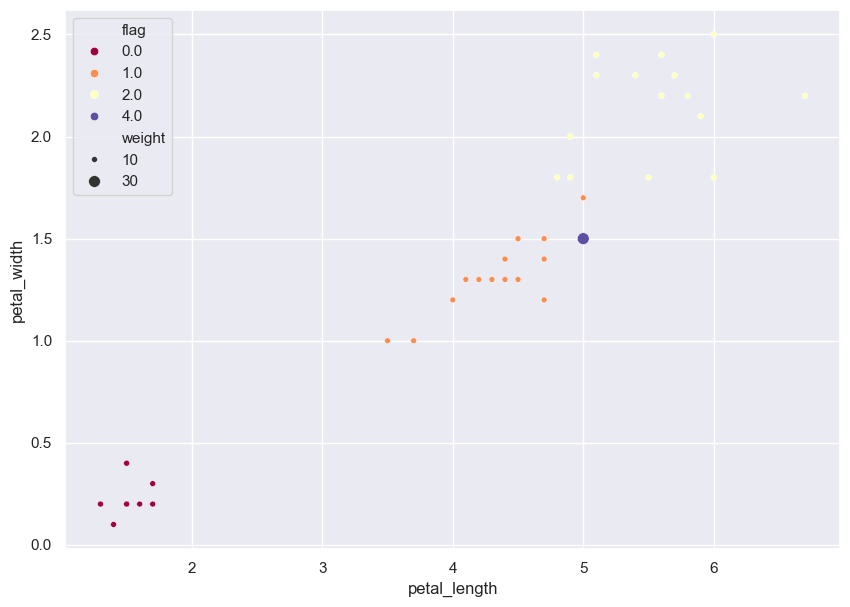

In [179]:
sns.scatterplot(x=X_test.petal_length, y=X_test.petal_width, hue=X_test.flag, size=X_test.weight, palette='Spectral')

In [158]:
results = X_test.copy()

In [159]:
results.to_sql('predicted_knn', conn, if_exists='replace', index=False)

45

In [160]:
# Close the connection
conn.close()